# Image Classification using CNN

**Image classification** is a fundamental task in the field of computer vision where an algorithm is trained to categorize images into predefined classes. It involves assigning a label from a fixed set of categories to an input image based on its visual content. This process leverages techniques in machine learning and deep learning, particularly convolutional neural networks (CNNs), to recognize patterns and features in images.

In this project, we focus on using image classification for women’s fashion clothing. Our goal is to develop a recommendation system that suggests similar fashion items based on a given image. By analyzing the visual characteristics of the clothing item in the input image, our system will identify and recommend visually similar items from a database of fashion images. This approach, implemented using a CNN model and a similarity search function, enhances the shopping experience by offering personalized suggestions, helping users find items that match their style and preferences more effectively.


### Applications of Image Classification

* **Medical Imaging:**
Image classification is used to identify diseases and abnormalities in medical images such as X-rays, MRIs, and CT scans. It assists doctors in diagnosing conditions like tumors, fractures, and infections with greater accuracy and efficiency.

* **Autonomous Vehicles:**
Autonomous vehicles rely on image classification to detect and recognize objects on the road, such as pedestrians, traffic signs, and other vehicles. This capability is crucial for navigating safely and making real-time driving decisions.

* **Security and Surveillance:**
In security systems, image classification helps in recognizing faces, detecting suspicious activities, and identifying unauthorized access. This enhances security measures in places like airports, banks, and public events.

* **Retail and E-commerce:**
Image classification aids in organizing and categorizing product images, improving search functionality, and enabling visual recommendation systems. Customers can find products more easily and receive personalized shopping suggestions.

* **Environmental Monitoring:**
Image classification is applied in monitoring environmental changes and detecting natural phenomena like deforestation, urbanization, and climate change impacts. It helps in analyzing satellite images and managing natural resources more effectively.

## What is CNN?
**A Convolutional Neural Network (CNN)** is a type of deep learning algorithm specifically designed for processing structured grid data, like images. CNNs consist of multiple layers, including convolutional layers that apply filters to the input to extract relevant features, such as edges, textures, and patterns. These features are then passed through pooling layers to reduce dimensionality and computational load, followed by fully connected layers that perform classification or regression tasks. CNNs are highly effective for image-related tasks because they can automatically learn hierarchical feature representations, making them the backbone of many modern computer vision applications.

### Why CNN is used for training this reccomendation system?

Convolutional Neural Networks (CNNs) are particularly well-suited for training recommendation systems for fashion items due to their powerful capabilities in image processing. By leveraging CNNs, the system can effectively analyze and understand the visual content of fashion images. This makes CNNs an ideal choice for accurately identifying and recommending similar fashion items based on a given image.

**Feature Extraction:**
CNNs excel at automatically extracting intricate features from images, such as edges, textures, and patterns. This capability is crucial for identifying the visual characteristics of fashion items.

**Hierarchical Learning:**
CNNs learn hierarchical representations of images, from low-level features to high-level concepts. This enables the model to understand complex visual relationships, improving recommendation accuracy.

**Spatial Invariance:**
The convolutional layers in CNNs ensure spatial invariance, meaning the model can recognize fashion items regardless of their position or orientation within the image, enhancing robustness.

**Efficiency:**
CNNs are computationally efficient due to shared weights and local connectivity in convolutional layers. This efficiency allows the model to handle large datasets of fashion images effectively.

**High Accuracy:**
CNNs have demonstrated high accuracy in various image classification tasks. Their proven performance ensures reliable identification of similar fashion items, leading to better recommendations.

In [4]:
#pip install rarfile

In [19]:
print(os.listdir(zip_directory))




['Image Classification.ipynb', 'Image_Classification(DL_CNN) (1).ipynb', 'women-fashion', 'women-fashion_zip.zip']


## Extracting Files from ZIP Archive

In [6]:
from zipfile import ZipFile
import os

# Directory containing the zip file
zip_directory = r"C:/Users/soumi/Downloads/Womens fashion ML"
# Path to the zip file (assuming there is only one zip file in the directory)
zip_file_name = None

# Check if the directory exists
if not os.path.exists(zip_directory):
    raise FileNotFoundError(f"The directory '{zip_directory}' does not exist.")

# Loop through files in the directory to find the zip file
for file in os.listdir(zip_directory):
    if file.endswith('.zip'):
        zip_file_name = file
        break

if zip_file_name is None:
    raise FileNotFoundError("No zip file found in the specified directory.")

zip_file_path = os.path.join(zip_directory, zip_file_name)
extraction_directory = r"C:/Users/soumi/Downloads/Womens fashion ML_extracted"

# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

# Function to create directories if they don't exist
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

# Open the zip file and extract its contents
with ZipFile(zip_file_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        # Construct the full path for the extraction
        member_path = os.path.join(extraction_directory, member)
        ensure_dir(member_path)  # Ensure the directory exists
        if not member.endswith('/'):  # Check if it's not a directory
            with zip_ref.open(member) as source, open(member_path, "wb") as target:
                target.write(source.read())

# List the extracted files
extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])  # Print the first 10 extracted files


['women fashion', '__MACOSX']


This above code is to locate a ZIP file in a specified directory, create necessary directories, and extract the contents of the ZIP file to a specified location. It also includes verification by listing some of the extracted files. The use of zipfile and os modules makes the process efficient and straightforward. The code functions in the following steps:

**Importing Necessary Modules:**
* `ZipFile` is imported from the zipfile module to handle ZIP file operations.
* `os` is imported to handle file and directory operations.

**Setting Up Paths:**
* zip_directory is set to the path where the ZIP file is located.
* zip_file_name is initialized to None to store the name of the ZIP file once found.

**Validating Directory and Locating ZIP File:**
* The script checks if `zip_directory` exists using `os.path.exists().` If not, it raises a `FileNotFoundError.`
* It then loops through the files in the directory using `os.listdir()`. If a file with a .zip extension is found, its name is stored in zip_file_name.
* If no ZIP file is found, it raises another FileNotFoundError.

**Preparing for Extraction:**
* The full path to the ZIP file is constructed using `os.path.join()`.
* `extraction_directory` is set to the path where the contents of the ZIP file will be extracted.
* It checks if extraction_directory exists, and if not, it creates the directory using `os.makedirs()`.

**Ensuring Directory Creation:**
* A helper function `ensure_dir` is defined to ensure that the necessary directories for each file are created.
* It extracts the directory part from the file path and creates it if it does not exist.

**Extracting the ZIP File:**
* The ZIP file is opened in read mode using `ZipFile()`.
* It iterates over the names of the members (files and directories) in the ZIP file using `zip_ref.namelist()`.
* For each member, it constructs the full extraction path and ensures that the required directories exist using `ensure_dir()`.
* If the member is a file (not a directory), it reads the file from the ZIP archive and writes it to the target path.

**Listing Extracted Files:**
* After extraction, the script lists the files in the extraction directory using `os.listdir()`.
* It prints the names of the first ten extracted files for verification purposes.

In [7]:
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

extraction_files_updated = os.listdir(extraction_directory_updated)
extraction_files_updated[:10], len(extraction_files_updated)

(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

* This code updates the extraction directory to include a specific subdirectory ('women fashion'). It then lists all the files and directories in this updated path. Finally, it retrieves and displays the first ten items from this list along with the total number of items, providing a quick overview of the contents in the updated extraction directory.







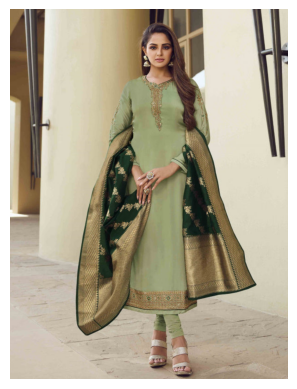

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
   
first_image_path = os.path.join(extraction_directory_updated, extraction_files_updated[1])
display_image(first_image_path)

This code performs the following tasks:

**Importing Necessary Modules**
* **PIL, or Python Imaging Library**, is a library in Python that provides extensive file format support, efficient internal representation, and powerful image processing capabilities.**Image** module is imported from the PIL module to handle image files.
* matplotlib.pyplot is imported as plt to enable plotting and displaying images.

**Defining the display_image Function:**
* This function takes a file path as an argument and displays the image located at that path.
* **Image.open(file_path)** opens the image file.
* **plt.imshow(image)** displays the image using Matplotlib.
* **plt.axis('off')** removes the axis for a cleaner display.
* **plt.show()** renders and shows the image plot.

**Setting the Path for the First Image:**
`first_image_path = os.path.join(extraction_directory_updated, extraction_files_updated[1])`
* This line constructs the full path to the first image file in the updated extraction directory.
* os.path.join() combines the directory path (extraction_directory_updated) with the filename (extraction_files_updated[1]).

**Displaying the First Image:**

`display_image(first_image_path)` This line executes the display_image function, opening and displaying the image located at the specified path using the function's defined steps.

In short, this code segment demonstrates how to display an image from the extracted files using the PIL and Matplotlib libraries. It defines a function display_image that opens and displays an image without axis markers. The path to the first image in the updated extraction directory is constructed and passed to this function, resulting in the image being rendered on the screen. This allows for visual verification of the extracted image files.











## Gathering Image File Path with glob.

In [9]:
import glob
image_directory = r"C:\Users\soumi\Downloads\Womens fashion ML\women-fashion\women fashion"
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg','.png','.jpeg'))]

#print the list of image file paths
print(image_paths_list)

['C:\\Users\\soumi\\Downloads\\Womens fashion ML\\women-fashion\\women fashion\\Anarkali suit with a modern twist.jpg', 'C:\\Users\\soumi\\Downloads\\Womens fashion ML\\women-fashion\\women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', 'C:\\Users\\soumi\\Downloads\\Womens fashion ML\\women-fashion\\women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'C:\\Users\\soumi\\Downloads\\Womens fashion ML\\women-fashion\\women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'C:\\Users\\soumi\\Downloads\\Womens fashion ML\\women-fashion\\women fashion\\ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'C:\\Users\\soumi\\Downloads\\Womens fashion ML\\women-fashion\\women fashion\\beige top adorned with black dots and a green skirt.jpg', 'C:\\Users\\soumi\\Downloads\\Womens fashion ML\\women-fashion\\women fashion\\black and white gingham c

This code snippet retrieves the file paths of image files (with extensions jpg, png, jpeg) from a specified directory using the glob module.

**Importing Necessary Modules:**
The `glob` module allows for pathname pattern matching, which is useful for finding files with specific extensions in a directory.

**Defining the Image Directory:**

* image_directory is set to the path where the image files are located.

**Creating a List of Image Paths:**
* The glob.glob() function is used to search for files matching the specified pattern (*.* represents all files) in the image_directory.
* The list comprehension filters the results to include only files with extensions '.jpg', '.png', or '.jpeg'.

**Printing the List of Image File Paths:**

* This line prints the list of image file paths retrieved by the previous step.

In short This code efficiently retrieves the file paths of image files from a specified directory, allowing for further processing or analysis of the image data. It utilizes the glob module for pattern matching and filtering based on file extensions.

In [10]:
#install libraries if required
#pip install tensorflow
#pip install keras

## Extracting Features from Images using VGG16

### About VGG16:
**VGG16** is a **convolutional neural network model** that was developed by the Visual Graphics Group at Oxford and achieved top performance in the 2014 ImageNet Large Scale Visual Recognition Challenge. It has 16 layers, consisting of convolutional and fully connected layers, designed to learn and extract hierarchical features from input images. VGG16 works by passing images through a series of convolutional layers with small receptive fields (3x3) and max-pooling layers, resulting in a deep feature representation.

**Why we are using it here:**

It is particularly useful in this context because its pre-trained weights on ImageNet allow it to extract high-quality, generalized features from images, making it suitable for tasks like image classification and content-based image retrieval without the need for extensive training from scratch.

In [11]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 [==============================] - 0s 228ms/step


**Importing Necessary Modules:**
* Various modules from TensorFlow and Keras are imported for image processing, loading the VGG16 model, and handling arrays.

**Loading the VGG16 Model:**
* The VGG16 model, pre-trained on the ImageNet dataset, is loaded with the top classification layer removed.
* A new model is defined using the base VGG16 model to extract features from images.

**Preprocessing Function:**
`preprocess_image(img_path)` function loads an image, resizes it to 224x224 pixels, converts it to an array, and preprocesses it for the VGG16 model.

**Feature Extraction Function:**
* `extract_features(model, preprocessed_img)`function uses the model to predict features for the preprocessed image, flattens the feature array, and normalizes it to unit length.

**Processing All Images:**
* This part of the code processes a list of image paths to extract features from each image using a pre-trained VGG16 model and stores these features along with the image names in the following steps.
  * **Initialization of Lists:**
     * Two empty lists, all_features and all_image_names, are initialized to store the extracted features and the corresponding image names, respectively.
     
  * **Loop Through Image Paths:**
     * A for loop is created and the loop iterates over each image path in the image_paths_list.
     
     * **For each image path, the following steps are performed:**
     
       * The image located at img_path is preprocessed using the `preprocess_image` function. This function resizes the image, converts it to an array, and prepares it for the VGG16 model. 
       * The preprocessed image is passed through the VGG16 model using the `extract_features` function. This function generates a feature vector by predicting the features, flattening the array, and normalizing it.
       * The extracted feature vector is appended to the `all_features` list.
       * The base name (file name) of the image is extracted using `os.path.basename(img_path)` and appended to the `all_image_names` list.


In short this code leverages the VGG16 model to preprocess and extract features from images found in a specified directory. Each image is resized, converted to an array, and preprocessed before being fed into the model to obtain feature vectors. The extracted features are then normalized and stored alongside the image names for further use, such as in image classification or recommendation systems.

## Building Fashion Item Recommendation Function Using Cosine Similarity"

In [12]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

This code defines a function recommend_fashion_items_cnn which recommends similar fashion items based on a provided input image by using a pre-trained VGG16 model to extract features and calculate similarity.

**Importing Necessary Module:**
* The cosine function from scipy.spatial.distance is used to compute cosine similarity between feature vectors.

**Defining the Recommendation Function:**
* `recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5)` function takes the input image path, the list of all extracted features, corresponding image names, the model, and the number of top similar items to recommend (top_n).
* The input image is preprocessed using the `preprocess_image` function.
* Features are extracted from the preprocessed image using the `extract_features function`

**Calculate Similarities:**
`similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
similar_indices = np.argsort(similarities)[-top_n:]`

* Cosine similarities between the input image features and all other image features are calculated.
* The indices of the top N most similar images are obtained by sorting the similarity scores.

**Filter Out the Input Image:**
`similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]`
* This line ensures that the input image itself is not included in the list of similar images.

**Display the Input Image:**
* A figure is created to display the input image alongside the recommended images.
* The input image is displayed in the first subplot.

**Display Similar Images:**
* A loop iterates through the top N similar images.
* Each recommended image is displayed in subsequent subplots with a title indicating its recommendation rank.
* plt.tight_layout() ensures that the subplots are nicely arranged without overlapping, and plt.show() renders the figure.

In short the function, `recommend_fashion_items_cnn`, recommends and displays the most similar fashion items based on an input image. It preprocesses the input image, extracts its features using a pre-trained VGG16 model, calculates the cosine similarity between the input image features and a set of stored features, and displays the top similar images alongside the input image for easy comparison. This process leverages deep learning and image feature extraction for efficient and effective visual recommendation.






## Recommendation Based on a Specific Image

1/1 [==============================] - 0s 220ms/step


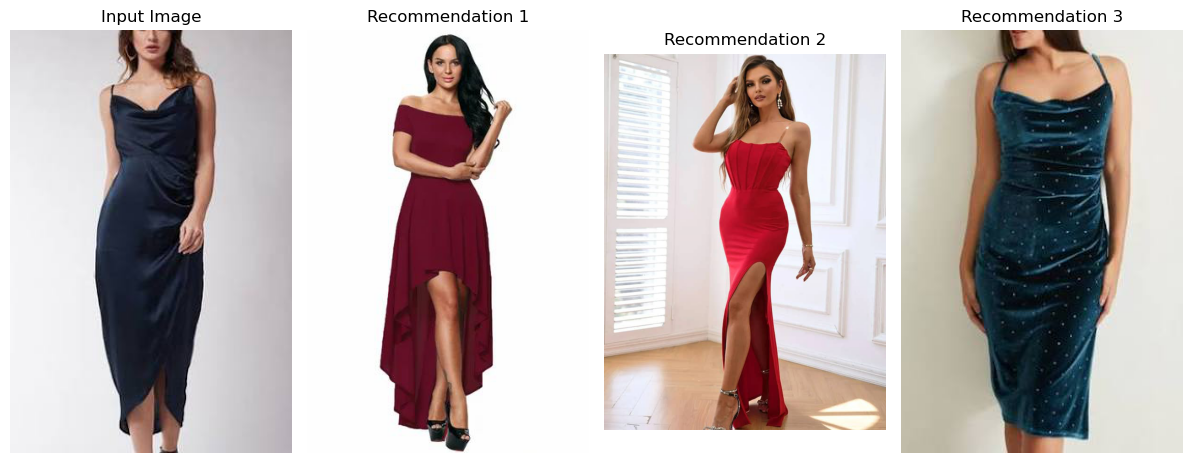

In [15]:
input_image_path = r"C:\Users\soumi\Downloads\Womens fashion ML\women-fashion\women fashion\dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg"
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)

1/1 [==============================] - 0s 161ms/step


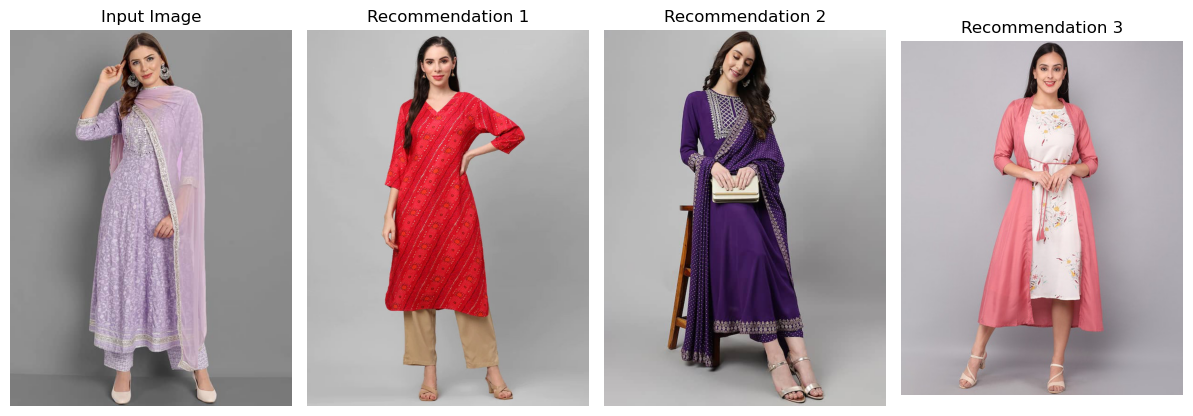

In [31]:
input_image_path =  r"C:\Users\soumi\Downloads\Womens fashion ML\women-fashion\women fashion\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg"
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)

1/1 [==============================] - 0s 161ms/step


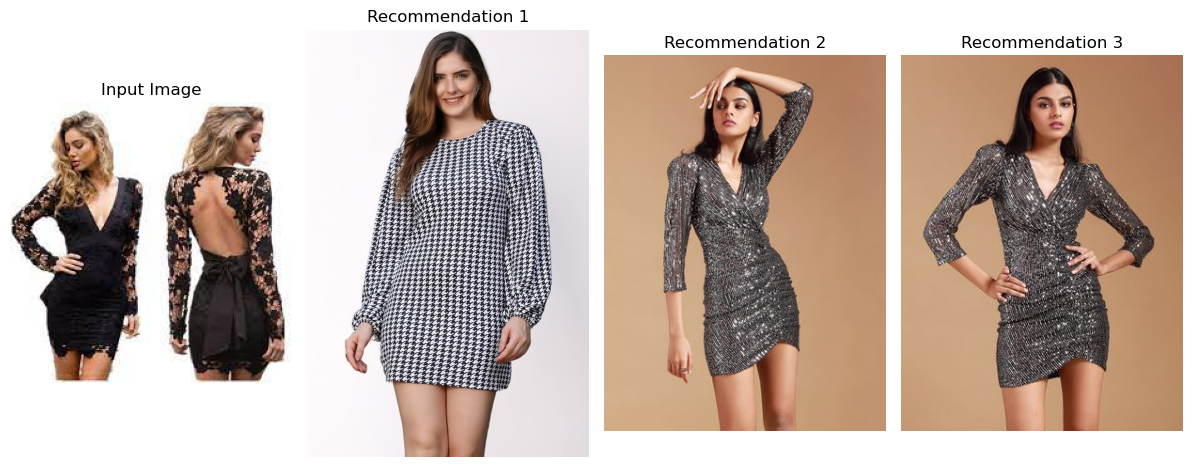

In [32]:
input_image_path =  r"C:\Users\soumi\Downloads\Womens fashion ML\women-fashion\women fashion\black dress with lace detailing.jpg"
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)

1/1 [==============================] - 0s 156ms/step


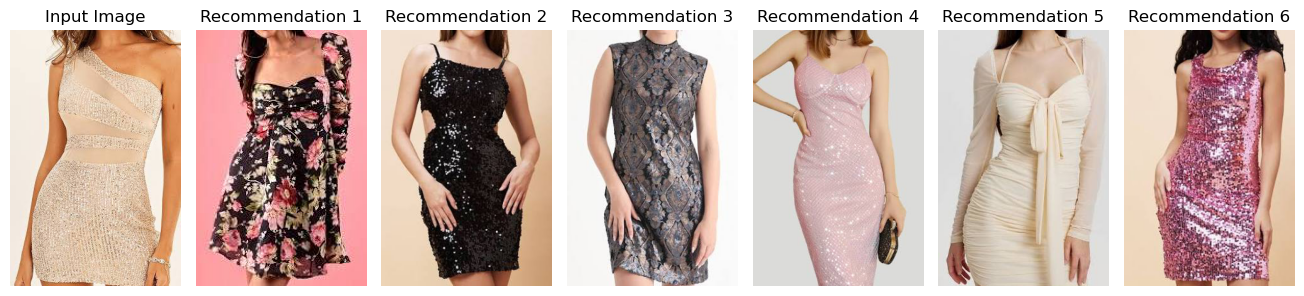

In [35]:
input_image_path =  r"C:\Users\soumi\Downloads\Womens fashion ML\women-fashion\women fashion\one-shoulder, fitted dress that features sequin embellishments and sheer panels.jpg"
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=7)# displaying top 7 suggestions

This line of code calls the `recommend_fashion_items_cnn` function with parameters: the path of the input image, a list of pre-extracted features from other fashion items, a list of paths for all fashion item images, a pre-trained VGG16 model, and the number of top similar items to recommend (set to 4 and in the last case set to 7). The function processes the input image, calculates its features, compares them with the features of other fashion items using cosine similarity, and displays the input image along with the top 4 most similar fashion items for recommendation.





